In [1]:
import pandas as pd
import numpy as np
from math import sqrt
path=r"Data\advertising.csv"
adver_data = pd.read_csv(path)

In [2]:
X2=np.array(adver_data[['TV', 'Radio', 'Newspaper']])
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data[['Sales']].values
means, stds = X.mean(axis=0), X.std(axis=0)
X = (X - means) / stds
X = np.hstack( (X, np.ones((X.shape[0], 1))) )
def mserror(y, y_pred):
    return np.sum((y - y_pred) ** 2) / y.shape[0]
def linear_prediction(X, w):
    return np.dot(X, w)




In [3]:
def stochastic_gradient_step2(X, y, w, train_ind, eta=0.01): 
    grad0 = 2*X[train_ind][0]*(linear_prediction(X[train_ind], w)-y[train_ind])/len(y)
    grad1 = 2*X[train_ind][1]*(linear_prediction(X[train_ind], w)-y[train_ind])/len(y)
    grad2 = 2*X[train_ind][2]*(linear_prediction(X[train_ind], w)-y[train_ind])/len(y)
    grad3 = 2*X[train_ind][3]*(linear_prediction(X[train_ind], w)-y[train_ind])/len(y)
    return  eta * np.array([grad0, grad1, grad2, grad3])

def stochastic_gradient_descent(X, y, w_init,eta=1e-2, rho=0.99,max_iter=1e4,
            max_weight_dist=1e-8, seed=42, ep=1e-3,verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # list of the sum square gradients for each variable
    sq_grad_avg = [0.0 for _ in range(w_init.shape[0])]
    # list of the average parameter updates
    sq_para_avg = [0.0 for _ in range(w_init.shape[0])]
    
    lst_range_iter=[100,1000,20000,50000,70000]
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while  weight_dist > max_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        #вычисляем значение весов на следующей итерации
        wOld = w
        gradient=stochastic_gradient_step2(X, y, w, random_ind, eta=eta)
        for i in range(gradient.shape[0]):
            # calculate the squared gradient
            sg = gradient[i]**2.0
            # update the moving average of the squared gradient
            sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
        
        for i in range(gradient.shape[0]):
            # calculate the step size for this variable
            alpha =  (ep + sqrt(sq_para_avg[i])) / (ep + sqrt(sq_grad_avg[i]))
            # calculate the change
            change = alpha * gradient[i]
            # update the moving average of squared parameter changes
            sq_para_avg[i] = (sq_para_avg[i] * rho) + (change**2.0 * (1.0-rho))
            gradient[i] = change
        w=w-gradient
#         if iter_num in lst_range_iter:
#             print(gradient)
        #расстояние между векторами весов на соседних итерациях
        weight_dist = np.linalg.norm(wOld - w)
        
        #среднеквадратичная ошибка для найденного вектора весов
        err = mserror( y, linear_prediction(X, w) )
        errors.append(err)
        
        #счётчик итераций
        iter_num += 1
    
    return w, errors

In [4]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros( (X.shape[1], 1) ), 
                                            ep=1e-4,rho=0.9,max_iter=1e6)
print(stoch_grad_desc_weights)
print(len(stoch_errors_by_iter))

[[ 2.9887191 ]
 [ 1.96888993]
 [ 0.32297779]
 [12.25259434]]
26001
Wall time: 2.4 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0, 0.5, 'MSE')

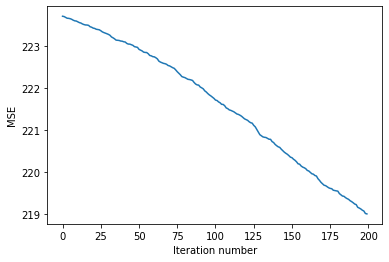

In [5]:
# from matplotlib.pyplot import plot
# %matplotlib inline
%pylab inline
plot(range(200), stoch_errors_by_iter[:200])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

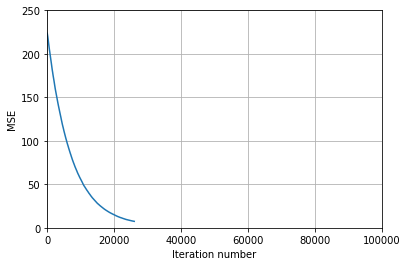

In [6]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
axis([0, 1e5, 0, 250])
grid(True)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [7]:
stoch_grad_desc_weights

array([[ 2.9887191 ],
       [ 1.96888993],
       [ 0.32297779],
       [12.25259434]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [8]:
stoch_errors_by_iter[-1]

7.425693375301621

In [9]:
def normal_equation(X, Y):
   
    a = np.linalg.lstsq(X, Y, rcond=None)[0]
    return a

In [10]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]
